# Import

In [129]:
import pandas as pd
import numpy as np
import plotly.express as px
import ast

# Data import

In [130]:
movie_df = pd.read_csv('F:\\For work\\movies.csv')

In [131]:
# lower case all columns
movie_df.columns = movie_df.columns.str.lower()

## EDA

In [132]:
movie_df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [133]:
# Check the length of the dataframe

len(movie_df)
print("There are", len(movie_df), "rows in the dataframe")

There are 9999 rows in the dataframe


In [134]:
#Check the columns

movie_df.columns
print("The columns in the dataset are: ", movie_df.columns)

The columns in the dataset are:  Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')


In [135]:
# Check missing values in all columns

movie_df.isnull().sum()
print("The missing values in the dataset are: ", movie_df.isnull().sum())

The missing values in the dataset are:  movies         0
year         644
genre         80
rating      1820
one-line       0
stars          0
votes       1820
runtime     2958
gross       9539
dtype: int64


In [136]:
# Check type of value in each column

movie_df.dtypes
print("The data types in the dataset are: ", movie_df.dtypes)

The data types in the dataset are:  movies       object
year         object
genre        object
rating      float64
one-line     object
stars        object
votes        object
runtime     float64
gross        object
dtype: object


In [137]:
movie_df['movies'].value_counts()

movies
 Bleach: Burîchi                         65
 Mighty Little Bheem                     64
 Avatar: The Last Airbender              61
 La Reina de Indias y el Conquistador    60
 Dexter                                  48
                                         ..
Ashby                                     1
Syucheu                                   1
#Realityhigh                              1
Eobiseu                                   1
 Heart of Invictus                        1
Name: count, Length: 6817, dtype: int64

In [138]:
# Check the number of unique values in each column

movie_df.nunique()

movies      6817
year         438
genre        510
rating        82
one-line    8688
stars       7877
votes       4129
runtime      261
gross        332
dtype: int64

In [139]:
# check year column

movie_df['year'].value_counts()

year
(2020– )           892
(2021– )           658
(2020)             639
(2019– )           549
(2019)             544
                  ... 
(1999– )             1
(I) (2013–2016)      1
(2002–2005)          1
(2010–2015)          1
(1985– )             1
Name: count, Length: 438, dtype: int64

In [140]:
# Check for duplicate rows

movie_df.duplicated().sum()

431

In [141]:
# see the duplicated rows

movie_df[movie_df.duplicated()]

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN


## Data Cleaning and Transformation

In [142]:
# Remove parentheses and extra characters
movie_df['year'] = movie_df['year'].str.replace(r'[\(\)I]', '', regex=True)

# Fill missing values with empty string
movie_df['year'].fillna('', inplace=True)

C:\Users\Junior\AppData\Local\Temp\ipykernel_13308\2251508638.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [143]:
movie_df['year'] = movie_df['year'].apply(lambda x: x.split('–')[0] if '–' in x else x)


In [144]:
movie_df['year'].value_counts()

year
2020               1585
2019               1302
2021               1072
2018                964
2017                714
                   ... 
XX                    1
2020 TV Short         1
1993 TV Special       1
1992 Video            1
2018 Video Game       1
Name: count, Length: 196, dtype: int64

In [145]:
# Remove words keep only numbers in year column

movie_df['year'] = movie_df['year'].str.extract('(\d+)')

<>:3: SyntaxWarning:

invalid escape sequence '\d'

<>:3: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Junior\AppData\Local\Temp\ipykernel_13308\4071537643.py:3: SyntaxWarning:

invalid escape sequence '\d'



In [146]:
movie_df['year'].value_counts()

year
2020    1694
2019    1420
2021    1117
2018    1089
2017     843
        ... 
1981       1
1971       1
1941       1
1958       1
1938       1
Name: count, Length: 78, dtype: int64

In [147]:
movie_df['year'].isna().sum()

748

In [148]:
# check the rows with missing values in year column

movie_df[movie_df['year'].isna()]


,movies,year,genre,rating,one-line,stars,votes,runtime,gross
878,Vikings: Valhalla,NaN,"\nAction, Adventure, Drama",NaN,\nFollow-up series to 'Vikings' set 100 years ...,"\n \n Stars:\nLaura Berlin, \nSa...",NaN,NaN,NaN
1155,The Killer,NaN,"\nAction, Crime, Drama",NaN,\nPlot unknown.,\n Director:\nDavid Fincher\n| \n Star:\...,NaN,NaN,NaN
1165,Hustle,NaN,"\nComedy, Drama, Sport",NaN,\nA washed-up basketball scout discovers a phe...,\n Director:\nJeremiah Zagar\n| \n Stars...,NaN,NaN,NaN
1375,Resident Evil,NaN,"\nAction, Horror, Sci-Fi",NaN,\nNearly three decades after the discovery of ...,"\n \n Stars:\nLance Reddick, \nS...",NaN,NaN,NaN
1414,Bright 2,NaN,"\nAction, Adventure, Crime",NaN,\nPlot unknown. Sequel to the 2017 film 'Bright.',"\n \n Stars:\nWill Smith, \nJoel...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9909,Pretty Smart,NaN,\nComedy,NaN,\nAdd a Plot\n,"\n \n Stars:\nCinthya Carmona, \...",NaN,NaN,NaN
9910,Pretty Smart,NaN,\nComedy,NaN,\nAdd a Plot\n,\n Director:\nJody Margolin Hahn\n| \n S...,NaN,NaN,NaN
9911,Pretty Smart,NaN,\nComedy,NaN,\nAdd a Plot\n,\n Director:\nJody Margolin Hahn\n| \n S...,NaN,NaN,NaN
9912,Pretty Smart,NaN,\nComedy,NaN,\nAdd a Plot\n,"\n \n Stars:\nCinthya Carmona, \...",NaN,NaN,NaN


In [149]:
#remove space from the beginning and end of the string in movies column

movie_df['movies'] = movie_df['movies'].str.strip()

In [150]:
# drop subset gross 

movie_df.dropna(subset=['gross'], inplace=True)

In [151]:
movie_df.shape

(460, 9)

In [152]:
# remove /n from genre column

movie_df['genre'] = movie_df['genre'].str.replace('\n', '')

In [153]:
movie_df

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
77,The Hitman's Bodyguard,2017,"Action, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M
85,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M
95,Don't Breathe,2016,"Crime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M
111,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M
125,Escape Room,2019,"Action, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,$57.01M
...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,2010,Documentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M
5770,Men at Lunch,2012,"Documentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...",\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M
5835,Decoding Deepak,2012,Documentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...",\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M
6056,Theo Who Lived,2016,Documentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M


In [154]:
movie_df['stars'] = movie_df['stars'].str.replace('\n', ',')

In [155]:
movie_df['stars'].value_counts()

stars
,    Director:,Patrick Hughes,| ,    Stars:,Ryan Reynolds, ,Samuel L. Jackson, ,Gary Oldman, ,Elodie Yung,                1
,    Director:,Alex Kurtzman,| ,    Stars:,Chris Pine, ,Elizabeth Banks, ,Michelle Pfeiffer, ,Olivia Wilde,               1
,    Director:,Frederik Du Chau,| ,    Stars:,Frankie Muniz, ,David Spade, ,Snoop Dogg, ,Bruce Greenwood,                 1
,    Director:,Lee Toland Krieger,| ,    Stars:,Rashida Jones, ,Andy Samberg, ,Elijah Wood, ,Emma Roberts,                1
,    Director:,Chris Kelly,| ,    Stars:,Jesse Plemons, ,Molly Shannon, ,Bradley Whitford, ,Maude Apatow,                 1
                                                                                                                         ..
,    Director:,Terry Jones,| ,    Stars:,Graham Chapman, ,John Cleese, ,Michael Palin, ,Terry Gilliam,                    1
,    Director:,Mikael Håfström,| ,    Stars:,Sylvester Stallone, ,Arnold Schwarzenegger, ,50 Cent, ,Vincent D'Onofrio,    1
, 

In [156]:
# Extract director from stars column
movie_df['director'] = movie_df['stars'].str.extract(r'Director:\s*([^|]*)')

# Find the index where 'Stars:' appears
stars_index = movie_df['stars'].str.find('Stars:')

# Remove director information by slicing the string from the 'Stars:' index
movie_df['stars'] = movie_df['stars'].str[stars_index.iloc[0]:].str.strip()

movie_df['director'] = movie_df['director'].str.replace('\n', '')

movie_df['director'] = movie_df['director'].str.replace(',', '')

movie_df['stars'] = movie_df['stars'].str.replace('\n', '')

movie_df['stars'] = movie_df['stars'].apply(lambda x: x.split(':', 1)[-1].strip())

movie_df['stars'] = movie_df['stars'].str.lstrip(',')

movie_df['stars'] = movie_df['stars'].str.rstrip(',')

In [157]:
movie_df['stars'] = movie_df['stars'].str.lstrip(',')

movie_df['stars'] = movie_df['stars'].str.rstrip(',')

In [158]:
movie_df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
77,The Hitman's Bodyguard,2017,"Action, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...","Ryan Reynolds, ,Samuel L. Jackson, ,Gary Oldma...","205,979",118.0,$75.47M,Patrick Hughes
85,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,"Sam Neill, ,Laura Dern, ,Jeff Goldblum, ,Richa...","897,444",127.0,$402.45M,Steven Spielberg
95,Don't Breathe,2016,"Crime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...","Stephen Lang, ,Jane Levy, ,Dylan Minnette, ,Da...","237,601",88.0,$89.22M,Fede Alvarez
111,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,"Elijah Wood, ,Ian McKellen, ,Orlando Bloom, ,S...","1,713,028",178.0,$315.54M,Peter Jackson
125,Escape Room,2019,"Action, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,"Taylor Russell, ,Logan Miller, ,Jay Ellis, ,Ty...","99,351",99.0,$57.01M,Adam Robitel


In [159]:
movie_df['stars'] = movie_df['stars'].str.replace(r',\s*,', ',', regex=True)

In [160]:
#Make stars column a list

movie_df['stars'] = movie_df['stars'].apply(lambda x: x.split(','))

In [161]:
movie_df.dtypes

movies       object
year         object
genre        object
rating      float64
one-line     object
stars        object
votes        object
runtime     float64
gross        object
director     object
dtype: object

In [162]:
movie_df['votes'].value_counts()

votes
6,897      2
205,979    1
25,758     1
30,382     1
10,487     1
          ..
378,134    1
233,030    1
82,876     1
140,930    1
126        1
Name: count, Length: 459, dtype: int64

In [163]:
movie_df['gross'] = movie_df['gross'].astype(str)

In [164]:
# remove $ sign from gross column

movie_df['gross'] = movie_df['gross'].str.replace('$', '')

In [165]:
# remove $ sign from gross column

movie_df['gross'] = movie_df['gross'].str.replace('M', '')

In [166]:
movie_df['gross'] = movie_df['gross'].astype(float)

In [167]:
movie_df['votes'] = movie_df['votes'].str.replace(',', '')

In [168]:
movie_df['votes'] = movie_df['votes'].astype(float)

In [169]:
movie_df['votes'].value_counts()

votes
6897.0      2
205979.0    1
25758.0     1
30382.0     1
10487.0     1
           ..
378134.0    1
233030.0    1
82876.0     1
140930.0    1
126.0       1
Name: count, Length: 459, dtype: int64

In [170]:
movie_df.describe()

,rating,votes,runtime,gross
count,460.000000,4.600000e+02,460.000000,460.000000
mean,6.638043,1.255499e+05,106.436957,43.701870
std,0.940894,2.124359e+05,21.380930,82.423304
min,3.100000,8.800000e+01,24.000000,0.000000
25%,6.100000,7.204250e+03,93.000000,0.150000
50%,6.600000,4.544950e+04,103.000000,6.145000
75%,7.300000,1.576860e+05,116.000000,46.947500
max,8.900000,1.713028e+06,228.000000,504.010000


In [173]:
movie_df

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
77,The Hitman's Bodyguard,2017,"Action, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...","[Ryan Reynolds, Samuel L. Jackson, Gary Oldman...",205979.0,118.0,75.47,Patrick Hughes
85,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,"[Sam Neill, Laura Dern, Jeff Goldblum, Richard...",897444.0,127.0,402.45,Steven Spielberg
95,Don't Breathe,2016,"Crime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...","[Stephen Lang, Jane Levy, Dylan Minnette, Dani...",237601.0,88.0,89.22,Fede Alvarez
111,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,"[Elijah Wood, Ian McKellen, Orlando Bloom, Sea...",1713028.0,178.0,315.54,Peter Jackson
125,Escape Room,2019,"Action, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,"[Taylor Russell, Logan Miller, Jay Ellis, Tyle...",99351.0,99.0,57.01,Adam Robitel
...,...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,2010,Documentary,6.5,\nVidal Sassoon is more than just a hairdresse...,"[Beverly Adams, Elgin Charles, Grace Coddingto...",245.0,90.0,0.09,Craig Teper
5770,Men at Lunch,2012,"Documentary, Mystery",6.3,"\nThe story of ""Lunch atop a Skyscraper,"" the ...","[Fionnula Flanagan, Peter Quinn, Ric Burns, Ch...",331.0,75.0,0.00,Seán Ó Cualáin
5835,Decoding Deepak,2012,Documentary,5.5,"\nDeepak Chopra's son, Gotham, spends a year t...","[Deepak Chopra, Gotham Chopra]",124.0,83.0,0.01,Gotham Chopra
6056,Theo Who Lived,2016,Documentary,6.8,\nA documentary on American journalist Theo Pa...,[Theo Padnos],111.0,86.0,0.01,David Schisgall


## Visualize data

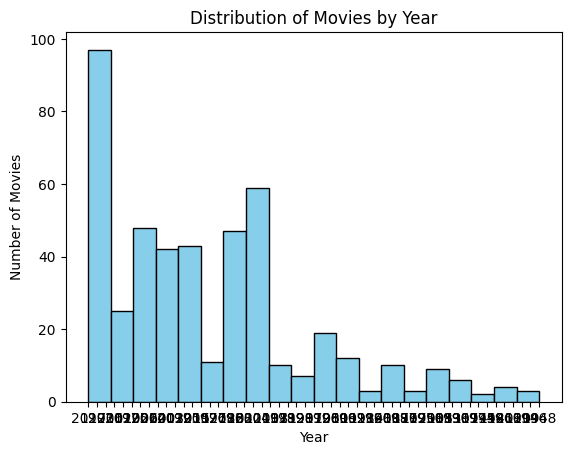

In [171]:
#using matplotlib to plot the histogram to see the distribution of the movies by year

import matplotlib.pyplot as plt

plt.hist(movie_df['year'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Year')
plt.show()


In [172]:
# plot the most common genres, using plotly express

genre_df = movie_df['genre'].str.split(',', expand=True).stack().value_counts().reset_index()
genre_df.columns = ['genre', 'count']

fig = px.bar(genre_df, x='genre', y='count', title='Most Common Genres')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed